In [136]:
import testing as tst
from matplotlib import pyplot as plt
from talib import MA as ma
from importlib import reload
import FedTools as ft
import numpy as np
import pandas as pd

In [176]:
speeches = pd.read_parquet("data/results/fine_tune_prompt_2/gpt-3.5-turbo_speeches.parquet")
press_conferences = pd.read_parquet("data/results/fine_tune_prompt_2/fine_tune_prompt_2_press_conferences.parquet")
hawkishness = pd.concat([speeches["hawk_score_1"], press_conferences["hawk_score_1"]]).dropna().sort_index()

KeyError: 'hawk_score_1'

In [174]:
rate = tst.get_fred("DGS5")[hawkishness.index[0]:].dropna()
inflation = tst.get_fred("CPIAUCSL").pct_change(12)[hawkishness.index[0]:].dropna()*100

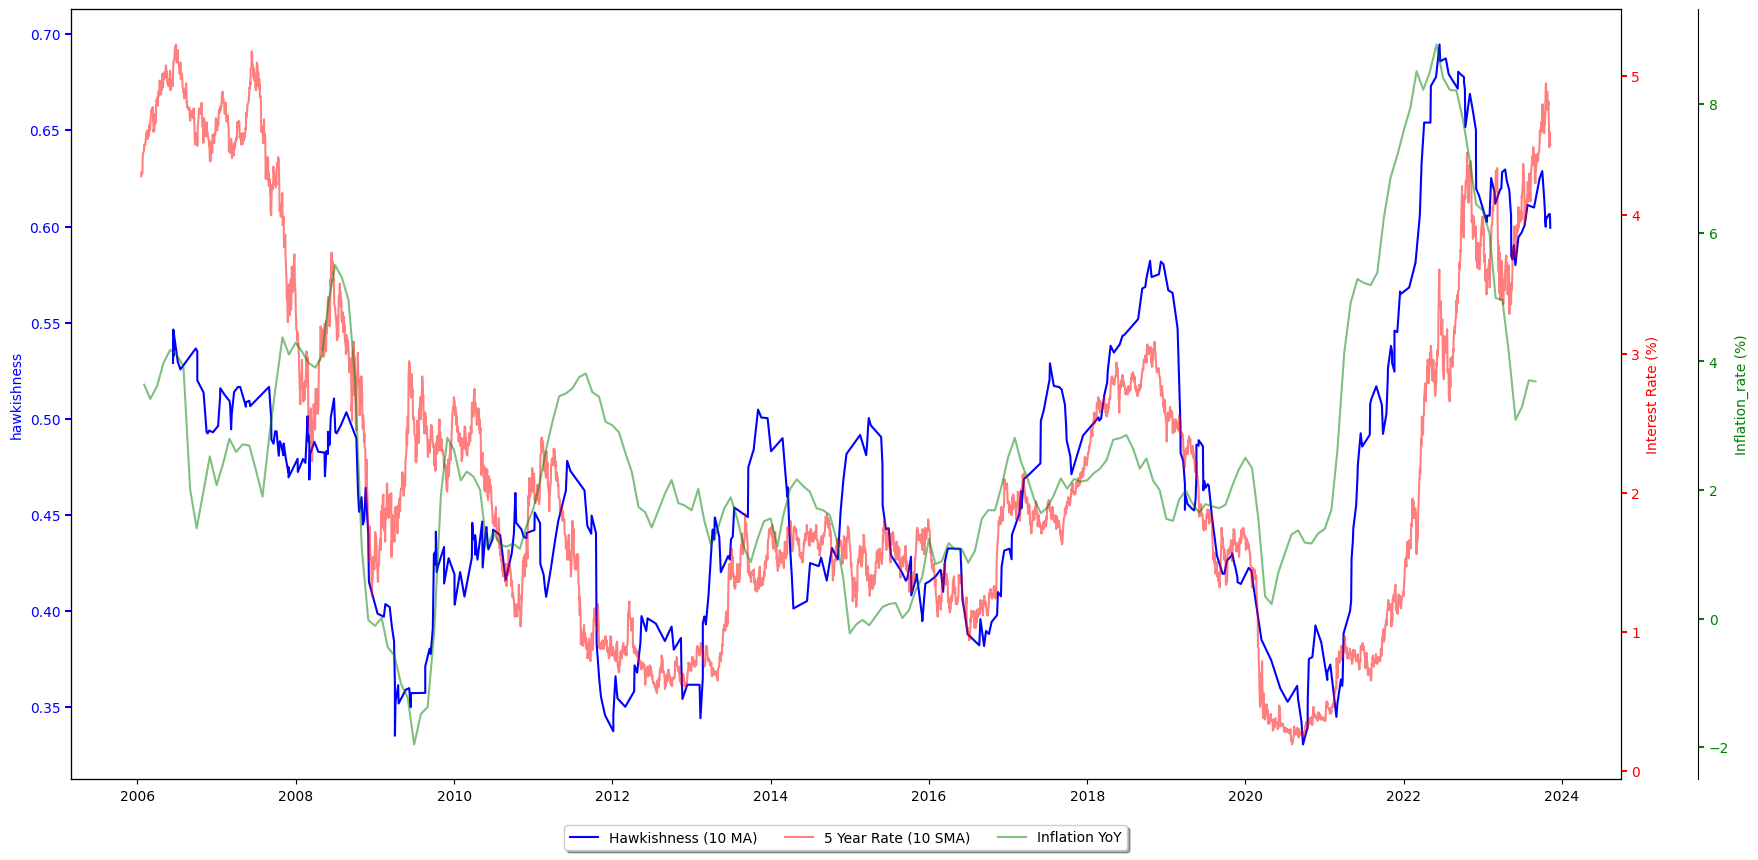

In [175]:
fig, ax = plt.subplots(figsize = (20,10))
# ln1 = ax.plot(hawkishness, "-o", alpha = 0.3, color = "grey", label = "Hawkishness")
ln2, = ax.plot(ma(hawkishness, 10), color = "blue", label = "Hawkishness (10 MA)")
ax2 = ax.twinx()
ln3, = ax2.plot(rate, color = "red", label = "5 Year Rate (10 SMA)", alpha = 0.5)
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.05))
ln4, = ax3.plot(inflation, color = "green", label = "Inflation YoY", alpha = 0.5)
lns = [ln2, ln3, ln4]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("hawkishness")
ax2.set_ylabel("Interest Rate (%)")
ax3.set_ylabel("Inflation_rate (%)")
ax.yaxis.label.set_color(ln2.get_color())
ax2.yaxis.label.set_color(ln3.get_color())
ax3.yaxis.label.set_color(ln4.get_color())
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=ln2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=ln3.get_color(), **tkw)
ax3.tick_params(axis='y', colors=ln4.get_color(), **tkw)

In [172]:
rate.corr(ma(hawkishness, 10))

0.5157107883319753

In [156]:
reload(tst)

<module 'testing' from '/Users/benjamin/Documents/Projects/Code/Python/fed-sentiment/testing.py'>

In [157]:
two_year = 1 + tst.get_fred("DGS2")[hawkishness.index[0]:].dropna()/100
five_year = 1 + tst.get_fred("DGS5")[hawkishness.index[0]:].dropna()/100
inflation = 1 + tst.get_fred("CPIAUCSL").pct_change(12)[hawkishness.index[0]:].dropna()
unemployment = 1 + tst.get_fred('UNRATE')[hawkishness.index[0]:].dropna()/100

In [158]:
corr_df_logs = tst.get_correlation_df(hawkishness, two_year, True, range(10, 101, 10), range(-60, 61, 10))
corr_df_levels = tst.get_correlation_df(hawkishness, two_year, False, range(10,101,10), range(-60,61,10))

In [159]:
df_log_max_corr_loc = tst.get_loc_max(corr_df_logs)
df_log_max_corr = corr_df_logs.loc[df_log_max_corr_loc]

df_level_max_corr_loc = tst.get_loc_max(corr_df_levels)
df_level_max_corr = corr_df_levels.loc[df_level_max_corr_loc]

print(f"Max Level Corr:\nLoc:{df_level_max_corr_loc}\nValue: {df_level_max_corr}\n\n")
print(f"Max Log Corr:\nLoc:{df_log_max_corr_loc}\nValue: {df_log_max_corr}\n\n")


Max Level Corr:
Loc:('shift_-40', 'ma_50')
Value: 0.9527074765523496


Max Log Corr:
Loc:('shift_-60', 'ma_70')
Value: 0.27582643416501285




In [96]:
rsquared_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60,61,10), "rsquared", two_year = two_year, inflation = inflation, unemployment = unemployment)
rsquared_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,0.064468,0.066611,0.066279,0.078068,0.092418,0.120451,0.107701,0.115152,0.11342,0.070549
shift_-50,0.028613,0.027589,0.040897,0.03708,0.059066,0.081071,0.066869,0.076473,0.075254,0.040092
shift_-40,0.05154,0.049754,0.0558,0.077184,0.078074,0.102672,0.100924,0.10296,0.09717,0.034833
shift_-30,0.025327,0.02609,0.031723,0.043418,0.052919,0.062588,0.061356,0.058314,0.049633,0.031572
shift_-20,0.106818,0.106594,0.113366,0.120336,0.131845,0.13533,0.134429,0.160759,0.166001,0.168246
shift_-10,0.044547,0.044017,0.053077,0.0579,0.060998,0.061097,0.076423,0.08313,0.079531,0.046798
shift_0,0.062869,0.049441,0.062383,0.060496,0.074295,0.075617,0.07264,0.097749,0.054083,0.042134
shift_10,0.020215,0.019779,0.036127,0.038413,0.050147,0.04822,0.056892,0.083165,0.045563,0.029198
shift_20,0.028925,0.033015,0.044289,0.052653,0.054615,0.063079,0.070985,0.076484,0.057416,0.033062
shift_30,0.022682,0.023126,0.032276,0.048044,0.051913,0.057769,0.074745,0.063899,0.013755,0.008046


In [97]:
rsquared_loc = tst.get_loc_max(rsquared_df)
print(f"Max R2:\nLoc:{rsquared_loc}\nValue: {rsquared_df.loc[rsquared_loc]}")

Max R2:
Loc:('shift_-20', 'ma_100')
Value: 0.16824561601605914


In [98]:
aic_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60, 61, 10), "aic", two_year = two_year, inflation = inflation, unemployment = unemployment)
aic_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,-5068.384731,-4959.953165,-4850.307356,-4747.71016,-4656.883644,-4585.566708,-4496.53896,-4417.987105,-4350.899629,-4242.308689
shift_-50,-4999.077311,-4888.381774,-4784.770382,-4676.721448,-4588.932186,-4567.540784,-4480.576938,-4379.112535,-4307.164827,-4199.705499
shift_-40,-4992.582776,-4882.229928,-4774.893519,-4678.227224,-4578.775686,-4528.628643,-4428.620649,-4328.977843,-4236.949325,-4133.07967
shift_-30,-4898.917509,-4793.977053,-4688.943143,-4588.546531,-4487.521624,-4424.367288,-4330.730094,-4227.452449,-4160.168322,-4063.897389
shift_-20,-4958.434158,-4857.764553,-4750.113598,-4646.638486,-4551.37274,-4476.318061,-4380.013281,-4305.531498,-4272.324207,-4168.034068
shift_-10,-4928.365477,-4827.886898,-4731.496479,-4651.188926,-4548.883812,-4482.006125,-4432.914794,-4336.395541,-4252.53187,-4139.356529
shift_0,-4927.892796,-4823.254004,-4726.555541,-4646.395589,-4554.466144,-4471.091816,-4389.194449,-4305.220217,-4237.319141,-4121.733144
shift_10,-4862.793917,-4758.922383,-4660.812143,-4610.493735,-4523.070286,-4476.666771,-4400.740085,-4335.440206,-4252.462678,-4133.34739
shift_20,-4909.318496,-4804.467222,-4703.420357,-4626.014628,-4524.817613,-4463.000798,-4371.833395,-4275.633937,-4189.185741,-4068.93951
shift_30,-4856.154042,-4753.249141,-4651.062164,-4593.974546,-4498.754621,-4468.745137,-4406.151613,-4294.240365,-4210.665148,-4096.024402


In [99]:
aic_loc = tst.get_loc_min(aic_df)
print(f"Min AIC:\nLoc:{aic_loc}\nValue: {aic_df.loc[aic_loc]}")

Min AIC:
Loc:('shift_-60', 'ma_10')
Value: -5068.384731068143


In [102]:
equal_series = tst.get_equivalent_series(hawkishness, True, 10, -60, two_year = two_year, inflation = inflation, unemployment = unemployment)
ols = tst.get_regression(equal_series["two_year"], equal_series["hawkishness"], equal_series["unemployment"], equal_series["inflation"])

In [103]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.55e-07
Time:                        10:44:05   Log-Likelihood:                 2538.2
No. Observations:                 488   AIC:                            -5068.
Df Residuals:                     484   BIC:                            -5052.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.587e-08   6.06e-05      0.000      1.000      -0.000       0.000
x1             0.0025      0.001      2.358      0.019       0.000       0.005
x2            -0.0528      0.013     -4.125      0.000      -0.078      -0.028
x3             0.0337      0.020      1.706      0.089      -0.005       0.073
==============================================================================
Omnibus:                       81.016   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.016
Skew:                           0.165   Prob(JB):                    3.21e-222
Kurtosis:                      10.075   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
tst.get_ar_x(np.array(rate), 1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 7183
Model:                     AutoReg(1)   Log Likelihood                9908.541
Method:               Conditional MLE   S.D. of innovations              0.061
Date:                Tue, 17 Oct 2023   AIC                         -19811.083
Time:                        11:36:07   BIC                         -19790.445
Sample:                             1   HQIC                        -19803.980
                                 7183                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      1.702      0.089      -0.000       0.005
y.L1           0.9991      0.000   2562.905      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

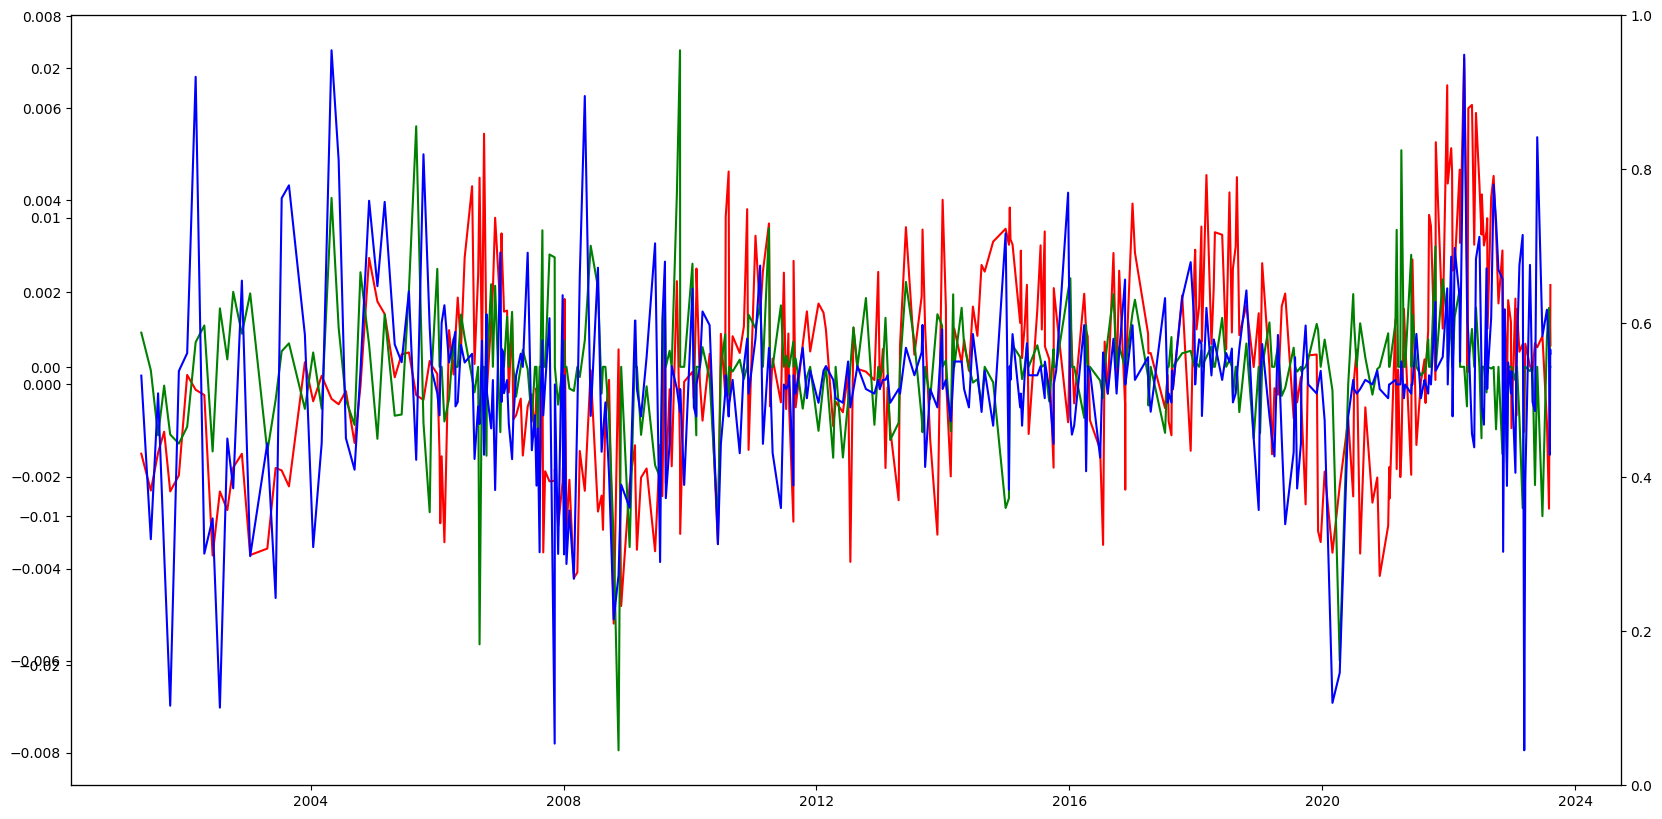

In [18]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(equal_series["hawkishness"], color = "red")
ax2 = ax.twinx()
ax2.plot(equal_series["two_year"], color = "blue")
ax3 = ax2.twinx()
ax.plot(equal_series["inflation"], color = "green")

In [133]:
x = pd.read_parquet("data/data_scraping/scraped_data/speeches.parquet")

In [134]:
x.iloc[-1,-1]

array(['I am particularly pleased to be here today for multiple reasons.',
       'I think most of us feel some nostalgic pull to these meetings, though I do not think I want to revisit the frantic interview cycle ever again.',
       'These meetings allow us to meet and reconnect with colleagues, hear about new and valuable research, and have in-depth discussions on the subtler, more nuanced aspects of economics.',
       "I hope to do that today with my co-panelists on a subject that has my and the Federal Open Market Committee's full attention: inflation.",
       "I want to use my time to outline the unique set of challenges facing policymakers and academics today as well as how we can better understand inflation dynamics in this new environment, including by looking at novel data sources.1The effects of the pandemic and Russia's war against Ukraine have turned a spotlight on the supply side of the economy and its ability to adapt to rapid changes in demand and to navigate a seemin

In [135]:
x

,speaker,title,link,text
date,,,,
2006-12-15,Chairman Ben S. Bernanke,The Chinese Economy: Progress and Challenges,/newsevents/speech/bernanke20061215a.htm,[The emergence of China as a global economic p...
2006-12-01,Chairman Ben S. Bernanke,Welcoming remarks,/newsevents/speech/bernanke20061201a.htm,"[Vice President Papademos, ladies and gentleme..."
2006-12-01,Vice Chairman Donald L. Kohn,Monetary Policy and Uncertainty,/newsevents/speech/kohn20061201a.htm,[Tonight I will talk about one of the themes o...
2006-11-30,Governor Susan Schmidt Bies,A U.S. Perspective on Basel II Implementation,/newsevents/speech/bies20061130a.htm,"[Good afternoon., Thank you for the invitation..."
2006-11-28,Chairman Ben S. Bernanke,The Economic Outlook,/newsevents/speech/bernanke20061128a.htm,"[Thank you for inviting me to speak today., I ..."
...,...,...,...,...
2023-01-20,Governor Christopher J. Waller,A Case for Cautious Optimism,/newsevents/speech/waller20230120a.htm,"[Thank you, Ben, and thank you to the Council ..."
2023-01-19,Vice Chair Lael Brainard,Staying the Course to Bring Inflation Down,/newsevents/speech/brainard20230119a.htm,"[Inflation has declined in recent months, whic..."
2023-01-10,Governor Michelle W. Bowman,Brief Remarks on the Economy and Bank Supervision,/newsevents/speech/bowman20230110a.htm,[Governor Bowman presented identical remarks t...


In [125]:
import os
x = os.listdir("data/data_scraping/press_conferences/pdf/")[0]

In [129]:
import regex as re
re.search(r"\d{8}", x).group(0)

'20140917'